Using Colab cache for faster access to the 'mall-customers' dataset.
DBSCAN 3D Aplicado. Clústeres: 4, Ruido: 39


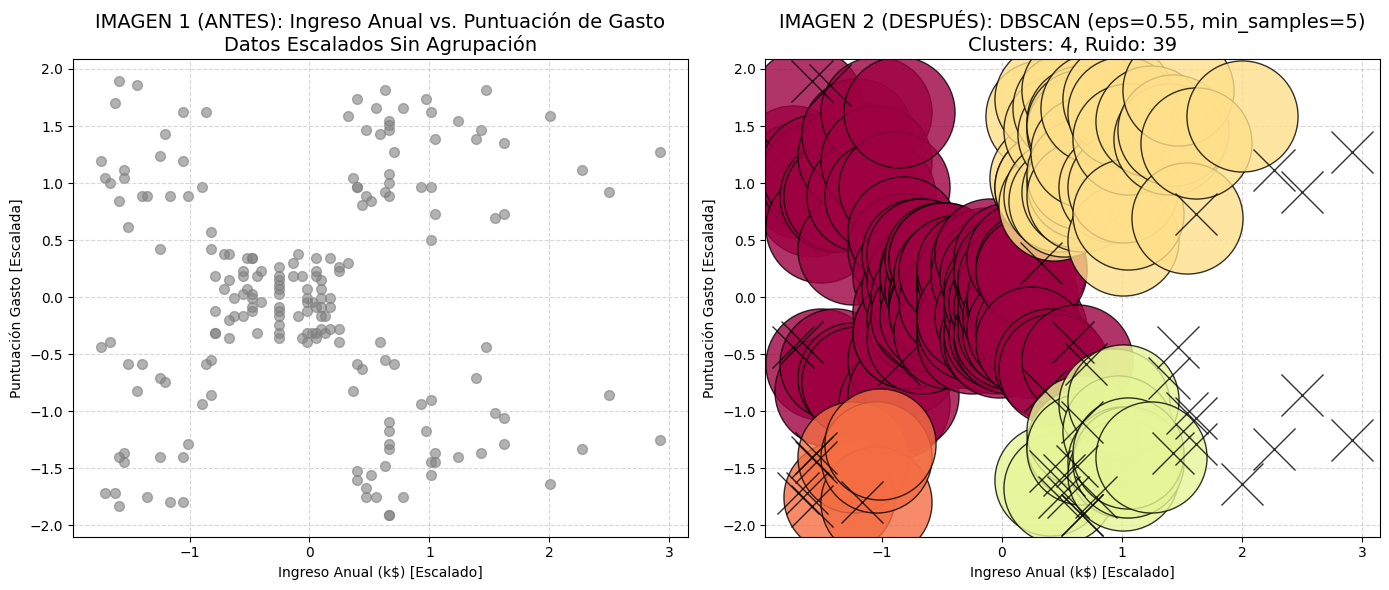

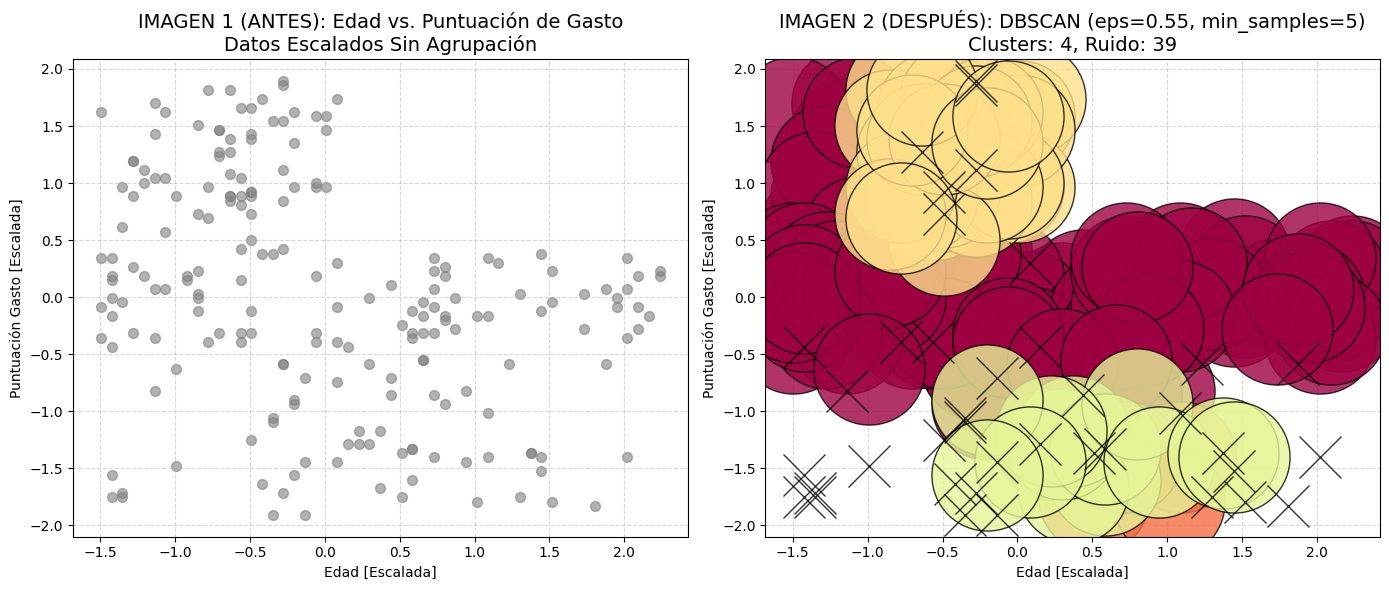

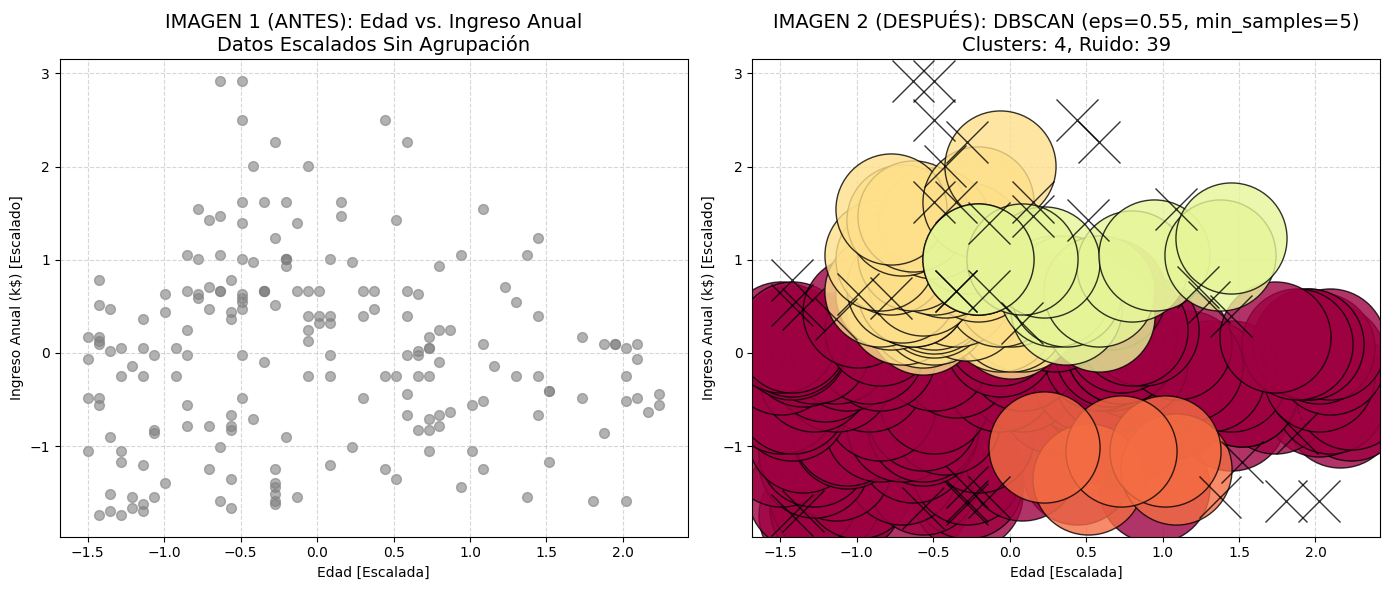

In [2]:
import kagglehub
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np



path = kagglehub.dataset_download("shwetabh123/mall-customers")
file_path = os.path.join(path, "Mall_Customers.csv")
datos = pd.read_csv(file_path)

#  Selección de las 3 variables y estandarización
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X_original = datos[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# Asignamos índices para fácil acceso a las columnas
IDX_EDAD = 0
IDX_INGRESO = 1
IDX_GASTO = 2

# 1.2. Aplicación de DBSCAN en 3D
# Usaremos parámetros que tienden a funcionar bien para este dataset escalado
eps_val = 0.55
min_samples_val = 5

db = DBSCAN(eps=eps_val, min_samples=min_samples_val)
clusters = db.fit_predict(X_scaled) # Clusters asignados en el espacio 3D

# Análisis de resultados
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = np.sum(clusters == -1)

print(f"DBSCAN 3D Aplicado. Clústeres: {n_clusters}, Ruido: {n_noise}")

# --- Función para generar las visualizaciones (solo definimos, no llamamos aún) ---
def generar_grafico_comparativo(X_data, labels, idx_x, idx_y, title_x, title_y, plot_title, eps, min_s, n_c, n_n):
    """Genera el par de gráficos Antes y Después para 2 variables."""

    plt.figure(figsize=(14, 6))

    # --- IMAGEN 1 (ANTES): Sin Agrupación ---
    plt.subplot(1, 2, 1)
    plt.scatter(X_data[:, idx_x], X_data[:, idx_y], c='gray', s=50, alpha=0.6)
    plt.title(f'IMAGEN 1 (ANTES): {plot_title}\nDatos Escalados Sin Agrupación', fontsize=14)
    plt.xlabel(title_x)
    plt.ylabel(title_y)
    plt.grid(True, linestyle='--', alpha=0.5)

    # --- IMAGEN 2 (DESPUÉS): Agrupado por DBSCAN ---
    plt.subplot(1, 2, 2)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each / len(unique_labels)) for each in range(len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1: # Ruido: negro y con 'x'
            face_color = 'k'
            marker = 'x'
            size = 30
        else: # Clústeres: de color y 'o'
            face_color = tuple(col)
            marker = 'o'
            size = 80

        class_member_mask = (labels == k)
        xy = X_data[class_member_mask]

        plt.plot(xy[:, idx_x], xy[:, idx_y], marker, markerfacecolor=face_color,
                 markeredgecolor='k', markersize=size, linestyle='', alpha=0.8)

    plt.title(f'IMAGEN 2 (DESPUÉS): DBSCAN (eps={eps}, min_samples={min_s})\nClusters: {n_c}, Ruido: {n_n}', fontsize=14)
    plt.xlabel(title_x)
    plt.ylabel(title_y)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# --- EJECUCIÓN DEL EXPERIMENTO 1 ---
generar_grafico_comparativo(
    X_scaled, clusters,
    IDX_INGRESO, IDX_GASTO,
    'Ingreso Anual (k$) [Escalado]', 'Puntuación Gasto [Escalada]',
    'Ingreso Anual vs. Puntuación de Gasto',
    eps_val, min_samples_val, n_clusters, n_noise
)

# --- EJECUCIÓN DEL EXPERIMENTO 2 ---
generar_grafico_comparativo(
    X_scaled, clusters,
    IDX_EDAD, IDX_GASTO,
    'Edad [Escalada]', 'Puntuación Gasto [Escalada]',
    'Edad vs. Puntuación de Gasto',
    eps_val, min_samples_val, n_clusters, n_noise
)

# --- EJECUCIÓN DEL EXPERIMENTO 3 ---
generar_grafico_comparativo(
    X_scaled, clusters,
    IDX_EDAD, IDX_INGRESO,
    'Edad [Escalada]', 'Ingreso Anual (k$) [Escalado]',
    'Edad vs. Ingreso Anual',
    eps_val, min_samples_val, n_clusters, n_noise
)